# 다항회귀와 과대적합/ 과소적합 이해
# (Polynomial Regression과 Over&Under Fitting)

## 1.다항회귀(Polynimial Regression)의 이해

- 다항회귀 : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항회귀(Polynomial Regression)라고 한다
- PolynomialFeatures 클래스를 통해 featrue를 Polynomial featrue로 변환한다.
- 만약 2차 다항값으로 변환한다면 [x1,x2]를 입력 받아 다음과 같이 반환한다

### [$x_{1}$,$x_{2}$]$\Rightarrow$ [1,$x_{1}$,$x_{1}^2$,$x_{1}x_{2}$,$x_{2}$,$x_{2}^2$]

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
# x1=0,x2=1 인 경우 다항식에 대입
# x1=2,x2=3 인 경우 다항식에 대입
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


## 3차 다항식 변환

### $y = 1+ 2X_{1} + 3X_{1}^2+4X_{2}^3$  을 만들고 싶음

In [4]:
# 함수 정의
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

In [8]:
X=np.arange(0,2).reshape(1,2)
y=polynomial_func(X)
y

[0]
[1]


array([5])

In [9]:
X=np.arange(2,4).reshape(1,2)
y=polynomial_func(X)
y

[2]
[3]


array([125])

In [10]:
X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)


일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


## PolynomialFeatures를 활용한 변환

### 3차 변환
### [$x_{1}$,$x_{2}$]$\Rightarrow$ [1,$x_{1}$,$x_{2}$,$x_{1}^2$,$x_{1}x_{2}$,$x_{2}^2$,$x_{1}^3$,$x_{1}^2x_{2}$,$x_{1}x_{2}^2$,$x_{2}^3$]

In [11]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X) # degree : 차수
print('3차 다항식 계수 feature: \n',poly_ftr)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


NameError: name 'LinearRegression' is not defined

In [12]:
from sklearn.linear_model import LinearRegression
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


#### 3차 변환의 항인 10개의 회귀 계수가 나옴을 볼 수 있다.

## 다항회귀를 이용한 보스턴 주택가격 예측

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd

In [18]:
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

Boston 데이타셋 크기 : (506, 14)


In [19]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
# 데이터 분리( 설명/ 예측 )
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

# 3차 변환
poly_X_data = PolynomialFeatures(degree=3).fit_transform(X_data)

# 데이터 나누기
poly_X_train , poly_X_test , y_train , y_test = train_test_split(poly_X_data , y_target ,test_size=0.3, random_state=156)


In [34]:
# 모델 피팅
p_model = LinearRegression()
p_model.fit(poly_X_train,y_train)

# 예측
p_y_preds_train=p_model.predict(poly_X_train)
p_y_preds_test=p_model.predict(poly_X_test)

# 평가
p_mse_train = mean_squared_error(y_train, p_y_preds_train)
p_rmse_train = np.sqrt(p_mse_train)

p_mse_test = mean_squared_error(y_test, p_y_preds_test)
p_rmse_test = np.sqrt(p_mse_test)


print("p_train_RMSE:",round(p_rmse_train,4))
print("p_test_RMSE:",round(p_rmse_test,4))

p_train_RMSE: 0.0
p_test_RMSE: 282.1801


### 그냥 회귀와 비교

In [36]:
# 그냥 X_data 사용해서 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# 모델 피팅
model = LinearRegression()
model.fit(X_train,y_train)

# 예측
y_preds_train=model.predict(X_train)
y_preds_test=model.predict(X_test)

# 평가
mse_train = mean_squared_error(y_train, y_preds_train)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(y_test, y_preds_test)
rmse_test = np.sqrt(mse_test)

print("train_RMSE:",round(rmse_train,4))
print("test_RMSE:",round(rmse_test,4))

train_RMSE: 4.9427
test_RMSE: 4.159


### 3차 다항회귀를 할 경우 train에서는 매우 성능이 좋으나 test에서 오히려 성능이 안좋아짐을 볼 수 있다. 
### 무조건 다항식으로 만드는 것은 과대적합의 우려가 있음을 알 수 있다.

## 2. 다항 회귀를 이용한 과소적합 및 과대적합 이해

- 다항 회귀는 feature의 직선적 관계가 아닌 복잡한 다항관계를 모델링할 수 있다.
- 차수가 높아질수록 복잡한 관계를 모델링 할 수 있다. 
- 하지만 degree가 높을수록 과적합되기 쉽다.
- 다음 예제를 통해 과대적합과 과소적합의 문제를 살펴본다

### 예시 데이터 생성

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

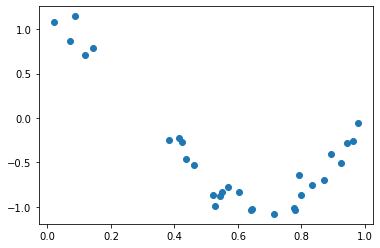

In [39]:
# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y)
plt.show()

- 위의 데이터는 랜덤으로 생성된 X에 cos함수를 해준 Y 데이터의 그래프이다

### 다항식 차수를 1,4,15로 변경하면서 결과를 비교해보겠다.
- 차수별로 학습을 수행한 후 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가할 것.
- 또한 0~1 사이의 균일한 100개의 test X 데이터를 이용해 차수별 회귀 예측 곡선을 그린다


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716240e+07
 -1.44873341e+08  7.09315840e+08 -2.47066022e+09  6.24561781e+09
 -1.15676672e+10  1.56895187e+10 -1.54006300e+10  1.06457475e+10
 -4.91378589e+09  1.35919961e+09 -1.70381209e+08] 입니다.
Degree 15 MSE 는 182594790.08 입니다.


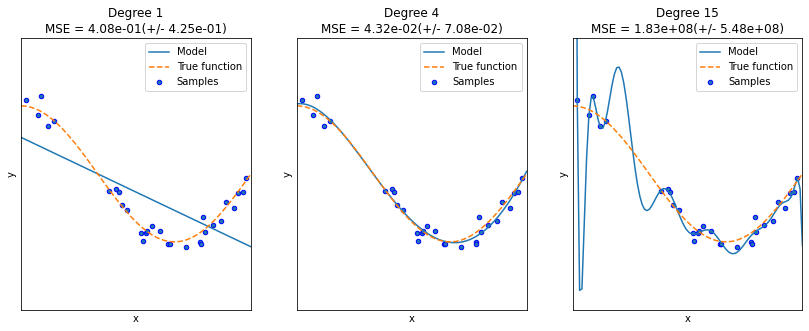

In [40]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다. >
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

- 맨 왼쪽의 Degree 1예측 곡선은 단순 선형 회귀와 같다. 실제 cos을 예측하기에는 너무 단순하기에, 과소적합 모델로 볼 수 있다.
- 가운데  Degree 4예측 곡선은 실제 dataset과 굉장히 유사하다. noise를 잡지는 못했지만 학습 데이터를 비교적 잘 반영하여 테스트 데이터까지 잘 예측하는 모델이 되었다.
- 맨 오른쪽 Degree 15 예측 곡선은 MSE 갑이 어처구니없는 값으로 높았다. 그래프를 보면 너무 noise까지 지나치게 반영한 과대적합 모델로 볼 수 있다.

### 가장 좋은 모델은 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델을 의미한다.

## 3. Bias-Variance Trade off

- 편향-분산 트레이드오프(Bias-Variance Trade off)는 머신러닝이 극복해야하는 가장 중요한 이슈 중 하나
- 편향 : train 데이터 내에서 얼마나 리스크를 가지느냐
- 분산 : 모델이 다른 데이터에서 얼마나 비슷하게 성능을 가지느냐
- Degree 1 같은 경우는 고편향(High Bias) & 저분산(Low Variance)를 가졌다고 볼 수 있다.
- Degree 15 같은 경우는 저편향(Low Bias) & 고분산(High Variance)를 가졌다고 볼 수 있다.

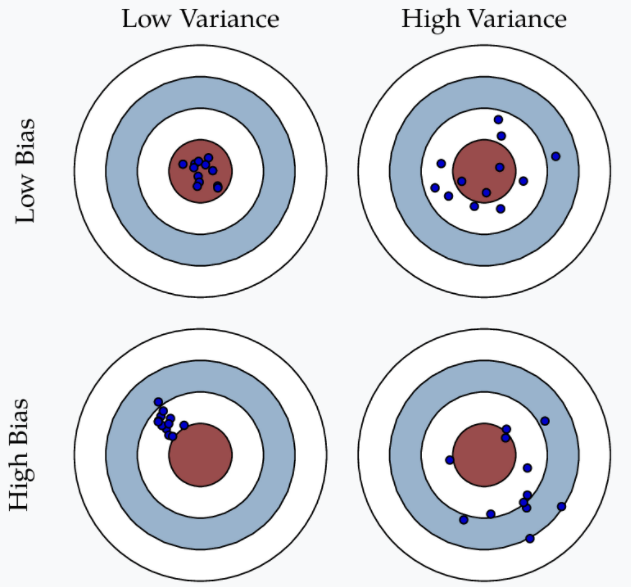

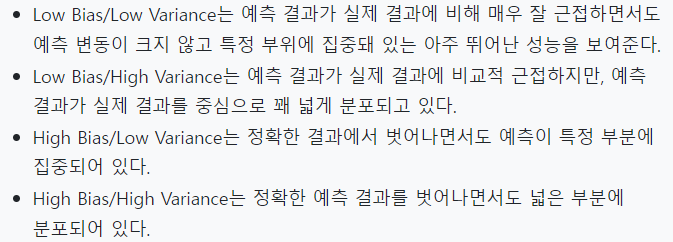

### 일반적으로 bias와 variance는 한 쪽이 높으면 다른 한 쪽이 낮아지는 경향이 있다.
### 이를 잘 고려한 모델링이 필요하며
### bias와 varince가 서로 trade off를 이루면서 가장 낮은 Cost를 가지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델이다

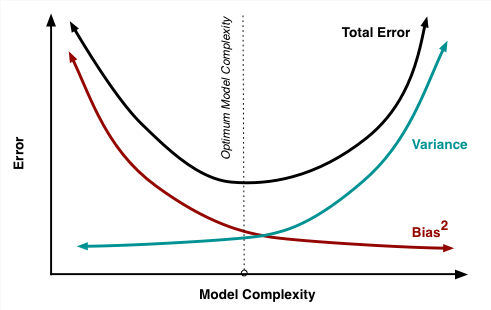